In [70]:
#Loading the important Libraries
import pandas as pd
import numpy as np

In [2]:
#Loading the dataset
df = pd.read_csv('zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
#Checking the null values
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:

df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [24]:
df["rate"]=df["rate"].str.strip()
df["rate"]=df["rate"].str.replace("-","")
df["rate"]=df["rate"].str.replace("NEW","")
df["rate"]=df["rate"].str.replace("/5","")

In [25]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '', '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [26]:
#The pd.to_numeric() function is used to convert the "rate" column to numeric values, and the errors="coerce" parameter ensures that any non-convertible values (including empty strings) are replaced with NaN. After this process, the "rate" column should only contain numeric values or NaN.
df["rate"] = pd.to_numeric(df["rate"], errors="coerce")

In [27]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [28]:
df['rate'].isnull().sum()

2277

In [30]:
df['rate'].describe()

count    49440.000000
mean         3.700378
std          0.404394
min          1.800000
25%          3.500000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

In [31]:
#We will replace the missing values in rate with its mean
df['rate'] = df['rate'].fillna(df['rate'].mean())

In [32]:
df['rate'].isnull().sum()

0

In [33]:
df.isnull().sum()/len(df)*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                            0.000000
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [34]:
#first we check the unique values in disk_liked 
df['dish_liked'].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [35]:
df['dish_liked'].value_counts()

Biryani                                                                                              182
Chicken Biryani                                                                                       73
Friendly Staff                                                                                        69
Waffles                                                                                               68
Paratha                                                                                               57
                                                                                                    ... 
Butter Chicken, Shawarma Roll, Chicken Shawarama, Chicken Grill, Rolls, Al Faham Chicken, Biryani      1
Filter Coffee, Sandwich, Bonda, Vada, Masala Dosa, Salad, Aloo Curry                                   1
Burgers, Fries, Jumbo Royale Burger, Salads, Peri Peri Chicken Salad, Potato Wedges, Rolls             1
Chaat, Pav Bhaji, Raj Kachori, Buttermilk, Ajwaini Para

In [36]:
#most liked dished is biryani so we replace missing values in dish_liked with biryani
df['dish_liked'] =df['dish_liked'].fillna('Biryani')

In [37]:
df['dish_liked'].isnull().sum()

0

In [38]:
df.isnull().sum()/len(df)*100

url                            0.000000
address                        0.000000
name                           0.000000
online_order                   0.000000
book_table                     0.000000
rate                           0.000000
votes                          0.000000
phone                          2.335789
location                       0.040606
rest_type                      0.438927
dish_liked                     0.000000
cuisines                       0.087012
approx_cost(for two people)    0.669026
reviews_list                   0.000000
menu_item                      0.000000
listed_in(type)                0.000000
listed_in(city)                0.000000
dtype: float64

In [39]:
#We have removed some columns which we donot have any need in our problem. 
df.drop(columns=["url","address","name","phone","menu_item"],axis="columns",inplace=True)

In [40]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [41]:
df.isnull().sum()/len(df)*100

online_order                   0.000000
book_table                     0.000000
rate                           0.000000
votes                          0.000000
location                       0.040606
rest_type                      0.438927
dish_liked                     0.000000
cuisines                       0.087012
approx_cost(for two people)    0.669026
reviews_list                   0.000000
listed_in(type)                0.000000
listed_in(city)                0.000000
dtype: float64

In [42]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [43]:
#Renaming the 'approx_cost(for two people) to Cost'
df=df.rename(columns={"listed_in(type)":"Services","listed_in(city)":"City","approx_cost(for two people)":"Cost"})
df

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Cost,reviews_list,Services,City
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6,27,Whitefield,Bar,Biryani,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
51713,No,No,3.7,0,Whitefield,Bar,Biryani,Finger Food,600,[],Pubs and bars,Whitefield
51714,No,No,3.7,0,Whitefield,Bar,Biryani,Finger Food,"2,000",[],Pubs and bars,Whitefield
51715,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [44]:
df['Cost'].isnull().sum()

346

In [45]:
df['Cost'].describe()

count     51371
unique       70
top         300
freq       7576
Name: Cost, dtype: object

In [46]:
df['Cost'] = pd.to_numeric(df['Cost'],errors = 'coerce')

In [47]:
df['Cost']

0        800.0
1        800.0
2        800.0
3        300.0
4        600.0
         ...  
51712      NaN
51713    600.0
51714      NaN
51715      NaN
51716      NaN
Name: Cost, Length: 51717, dtype: float64

In [48]:
df['Cost'].describe()

count    44454.000000
mean       416.630112
std        194.614442
min         40.000000
25%        300.000000
50%        400.000000
75%        550.000000
max        950.000000
Name: Cost, dtype: float64

In [49]:
#We will raplace it by its mean 
df['Cost'] = df['Cost'].fillna(df['Cost'].mean())

In [50]:
df['Cost'].isnull().sum()

0

In [51]:
df.isnull().sum()/len(df)*100

online_order    0.000000
book_table      0.000000
rate            0.000000
votes           0.000000
location        0.040606
rest_type       0.438927
dish_liked      0.000000
cuisines        0.087012
Cost            0.000000
reviews_list    0.000000
Services        0.000000
City            0.000000
dtype: float64

In [52]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [53]:
#Removing null values from these columns
df.dropna(subset = ['rest_type','cuisines'],inplace = True)

In [54]:
df.isnull().sum()

online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
Cost            0
reviews_list    0
Services        0
City            0
dtype: int64

In [71]:
#Visualization part


In [56]:
#Important libraries for the the visualization part
import seaborn as sns
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='online_order', ylabel='count'>

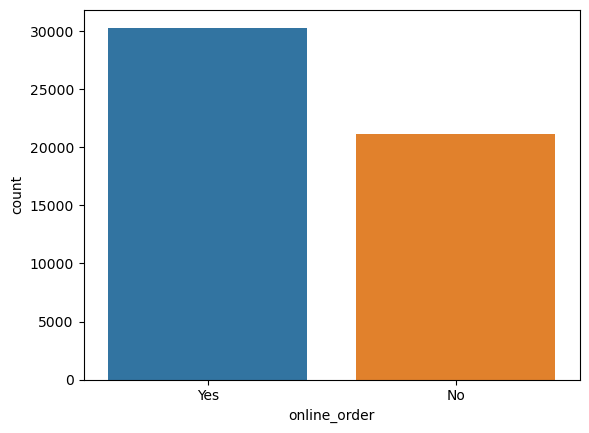

In [57]:
#Plotting graph for Restaurants delivering Online or not
sns.countplot(x = 'online_order',data = df)

<AxesSubplot:xlabel='book_table', ylabel='count'>

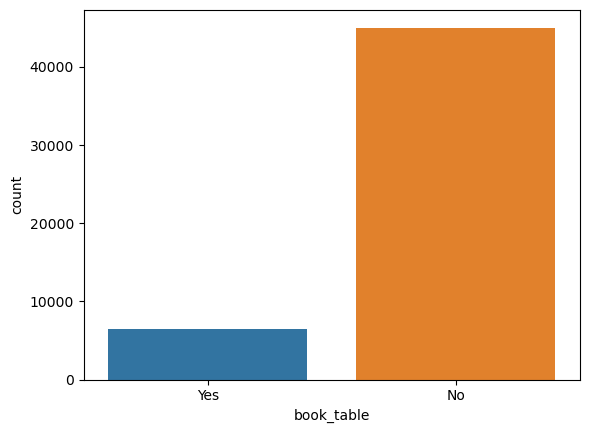

In [58]:
# Plotting graph for Restaurants allowing table booking or not
sns.countplot(x = 'book_table',data = df)

<AxesSubplot:xlabel='book_table', ylabel='rate'>

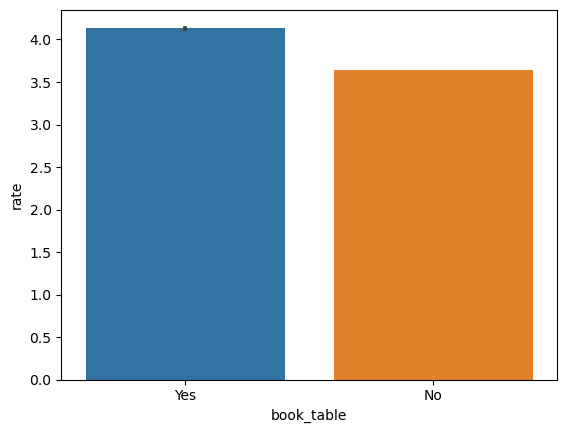

In [59]:
#plotting graph for Table booking Rate vs Rate
sns.barplot(x = 'book_table',y= 'rate',data = df)

<AxesSubplot:xlabel='rate', ylabel='location'>

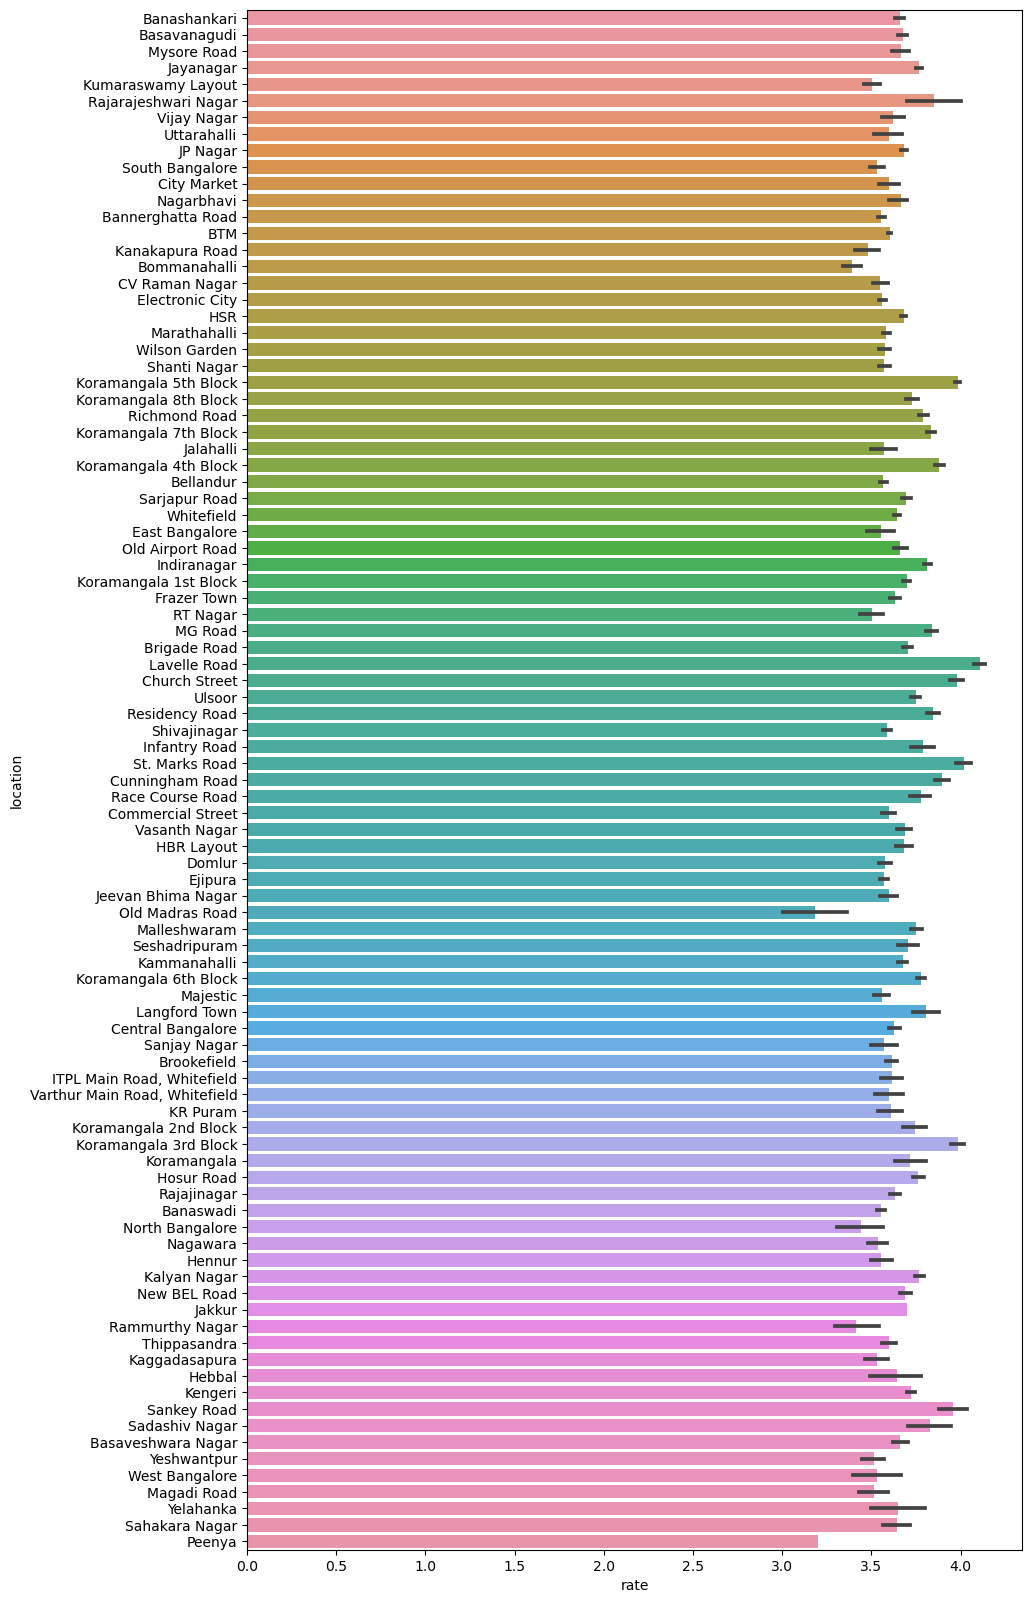

In [62]:
#Relation between Location and Rating
plt.figure(figsize = (10,20))
sns.barplot(x = 'rate',y = 'location',data = df)

<AxesSubplot:xlabel='count', ylabel='rest_type'>

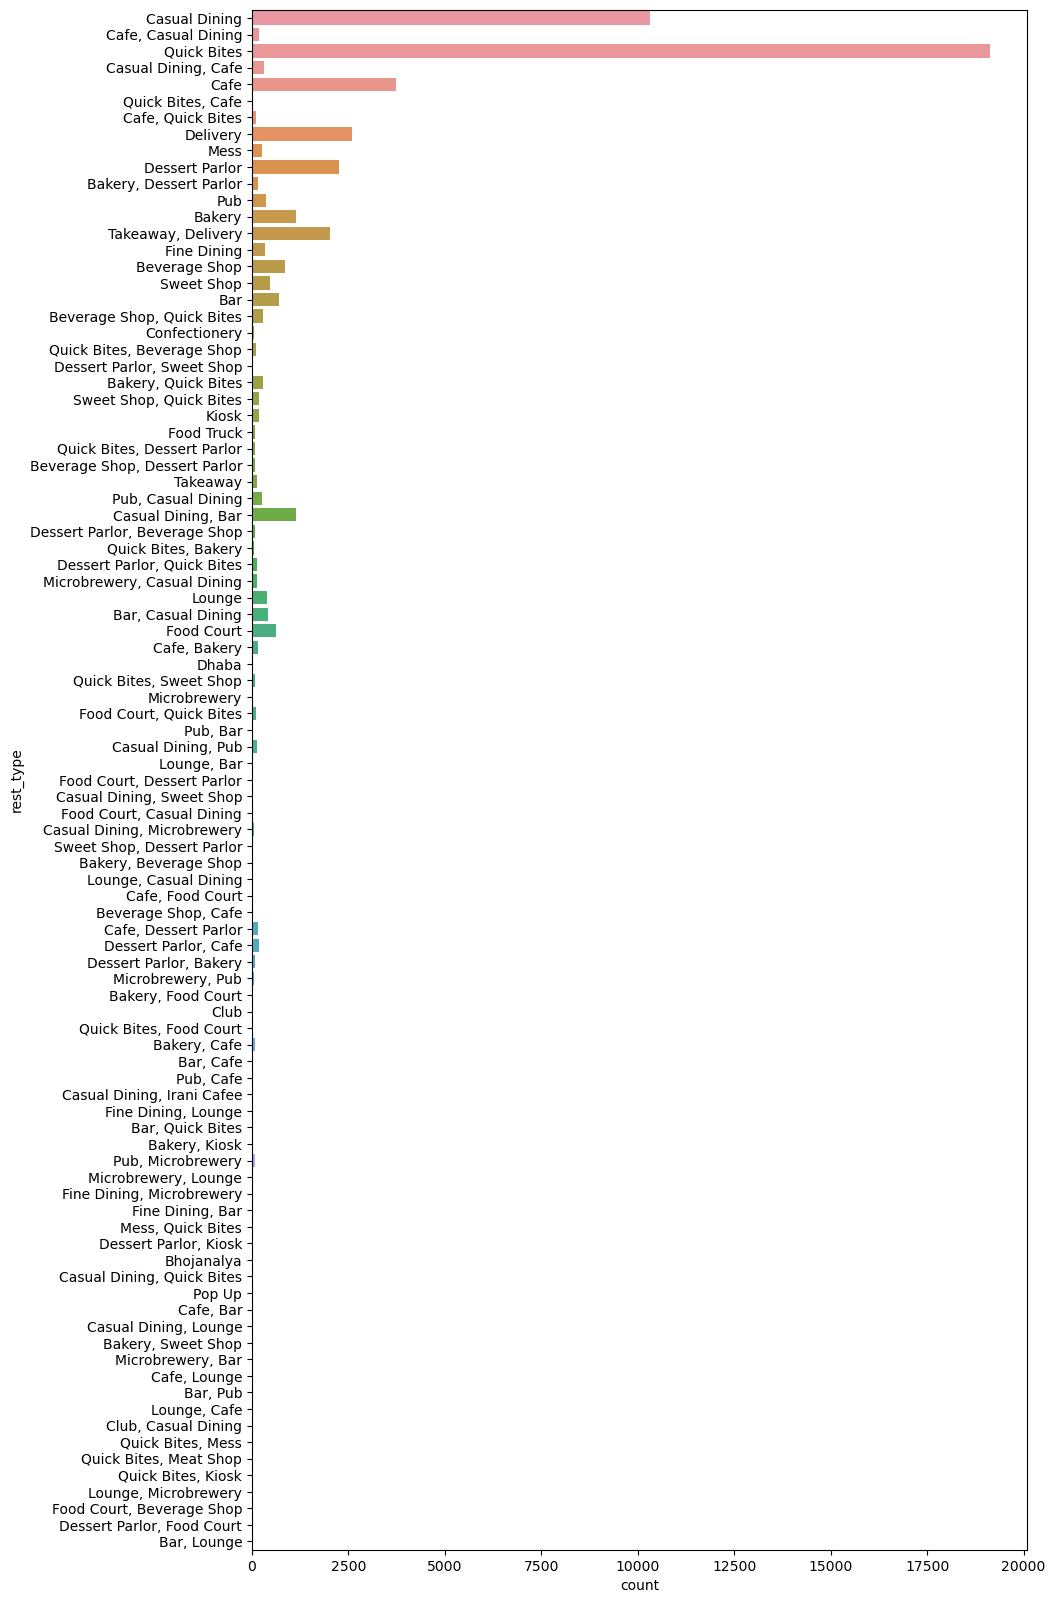

In [65]:
#Restaurant Type
plt.figure(figsize = (10,20))
sns.countplot(y = 'rest_type',data = df)

<AxesSubplot:xlabel='Services', ylabel='count'>

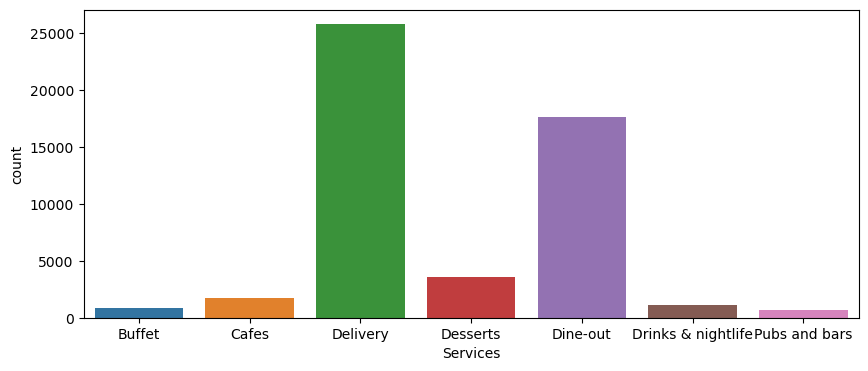

In [67]:
#Types of Services
plt.figure(figsize = (10,4))
sns.countplot(x = 'Services',data = df)

<AxesSubplot:xlabel='rate', ylabel='rest_type'>

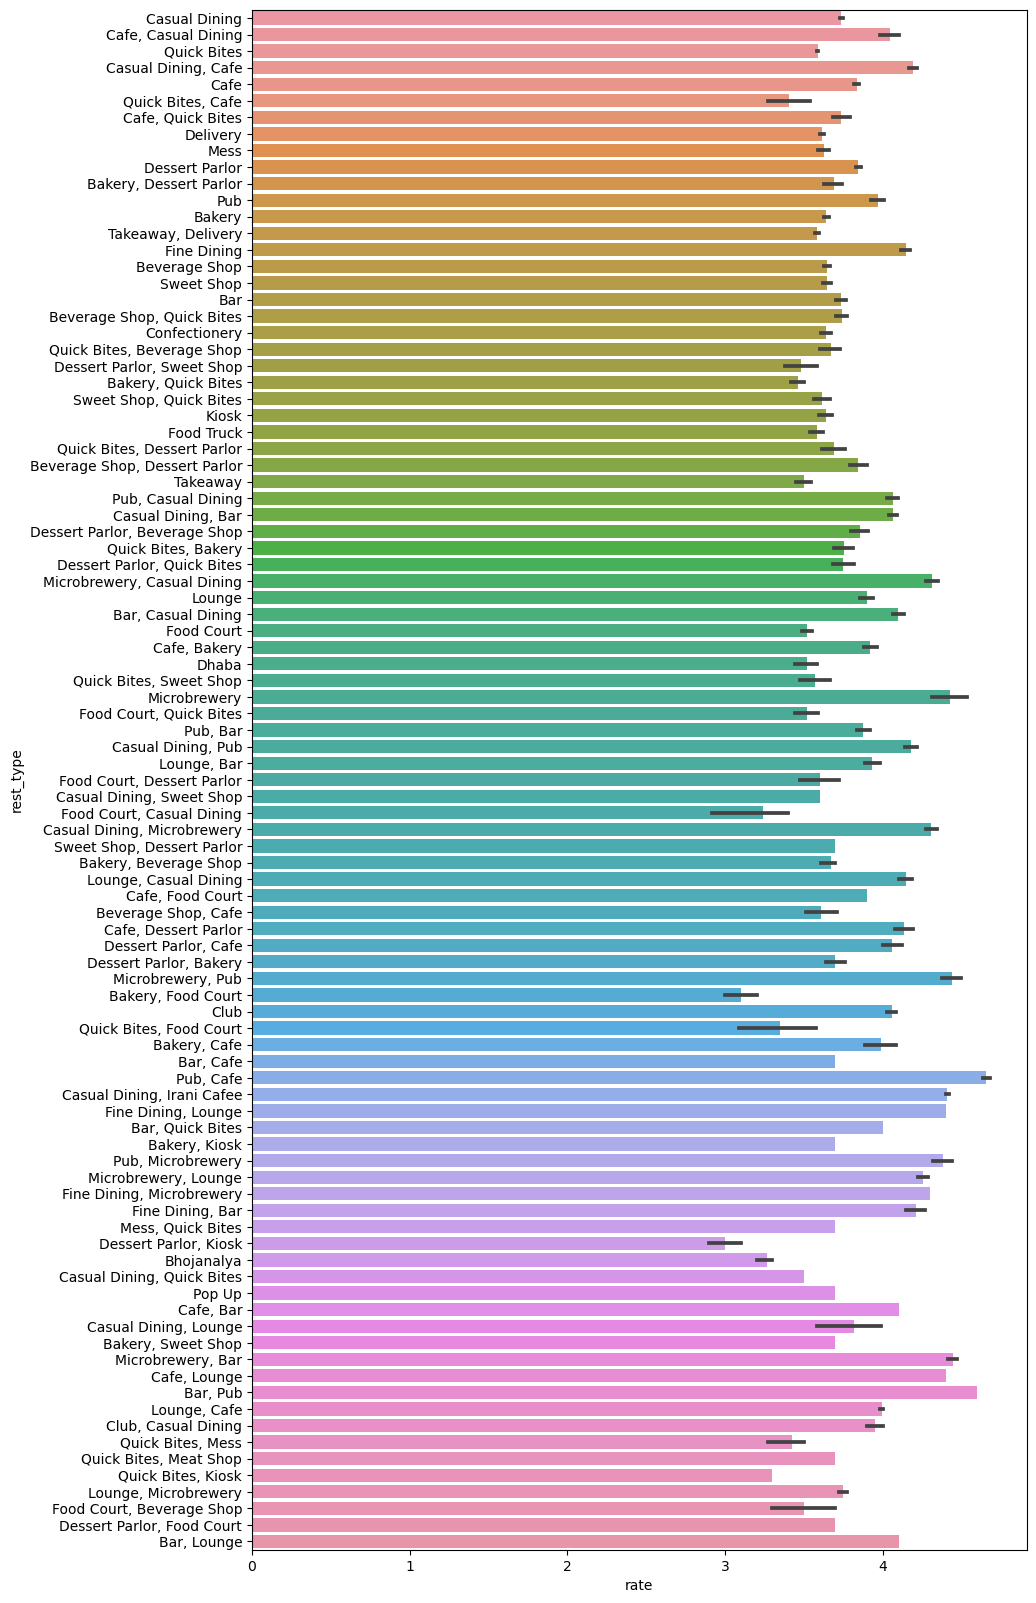

In [69]:
#Relation between Type and Rating
plt.figure(figsize = (10,20))
sns.barplot(x = 'rate',y='rest_type',data = df)